<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-3-CLASSIFICATION/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [69]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [70]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv',encoding='latin-1')

### Dataset First View

In [72]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [73]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [74]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [75]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [76]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Axes(0.125,0.125;0.698618x0.755)


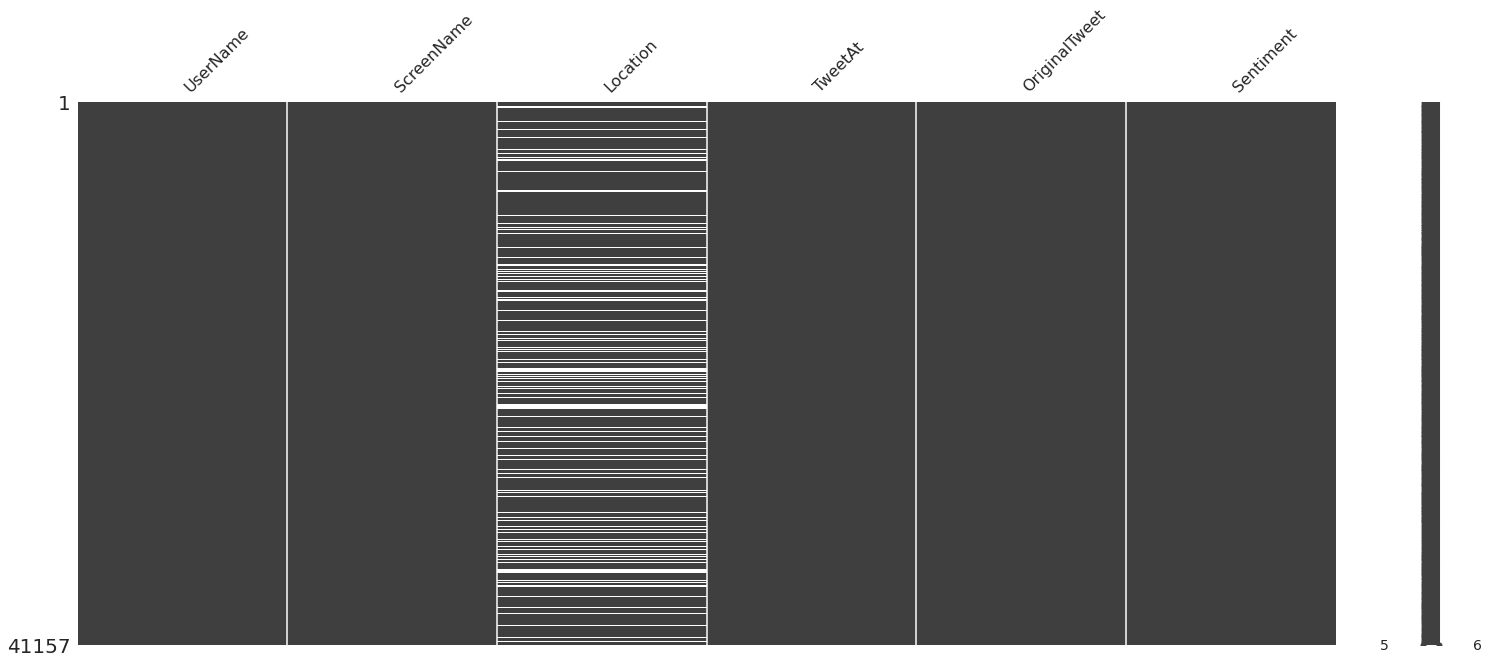

In [77]:
# Visualizing the missing values
import missingno as msno
print(msno.matrix(df))

Axes(0.125,0.125;0.775x0.755)


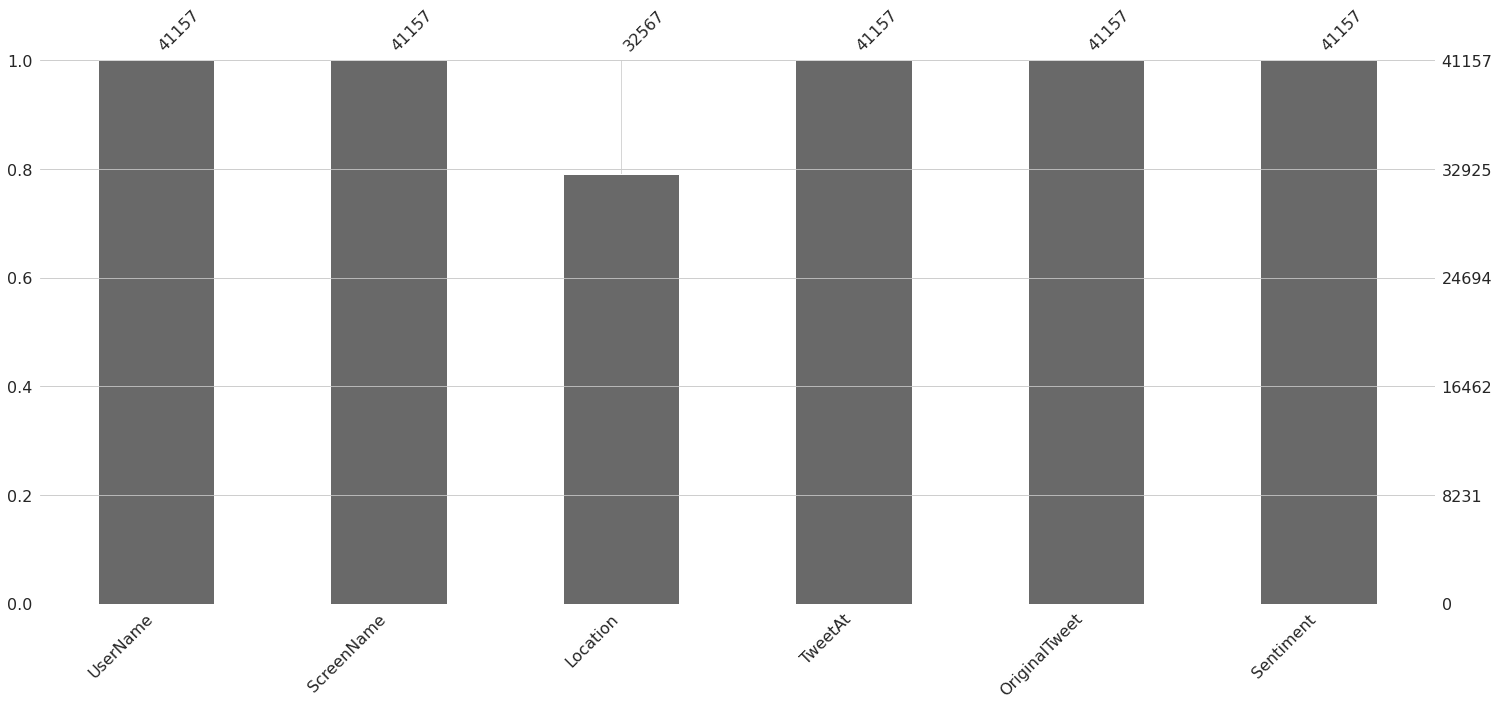

In [78]:
print(msno.bar(df))

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [79]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [80]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
for i in list(df.columns):
  print(i)
  print(df[i].unique())
  print('length:',len(df[i].unique()))
  print('-'*50)

UserName
[ 3799  3800  3801 ... 44953 44954 44955]
length: 41157
--------------------------------------------------
ScreenName
[48751 48752 48753 ... 89905 89906 89907]
length: 41157
--------------------------------------------------
Location
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
length: 12221
--------------------------------------------------
TweetAt
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
length: 30
--------------------------------------------------
OriginalTweet
['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advi

## 3. ***Data Wrangling***

### Data Wrangling Code

In [82]:
# Write your code to make your dataset analysis ready.
df1=df.copy()
df1.isnull().sum()/len(df)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

Location had 20.8 % null values so those rows has been dropped.

In [83]:
df1.dropna(inplace=True)

In [84]:
df1.shape

(32567, 6)

Original dataset had 41157 columns now it has 32567 columns after dropping the null values.

In [85]:
#Extracting Day and Month fron TweetAt
#df1['TweetAt'] = pd.to_datetime(df['TweetAt'])
df1['Day']=pd.DatetimeIndex(df1['TweetAt']).day
df1['Month']=pd.DatetimeIndex(df1['TweetAt']).month

In [86]:
#Converting the string into lowercase
df1['Location']=df1['Location'].str.lower()
df1['OriginalTweet']=df1['OriginalTweet'].str.lower()

### What all manipulations have you done and insights you found?

1. Location column had around 21% of null values So those values has been dropped.
2. Created Day and Month as new column from TweetAt column which will provide information regarding the busiest day and month.Since the data present is of a particular year(2020) so year column hasn't been created.
3. Converted Location and OriginalTweet column to lower case to avoid case sensitivity.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Location

In [87]:
loc=df1['Location'].value_counts().sort_values(ascending=False)[:10]

<Axes: xlabel='Location', ylabel='count'>

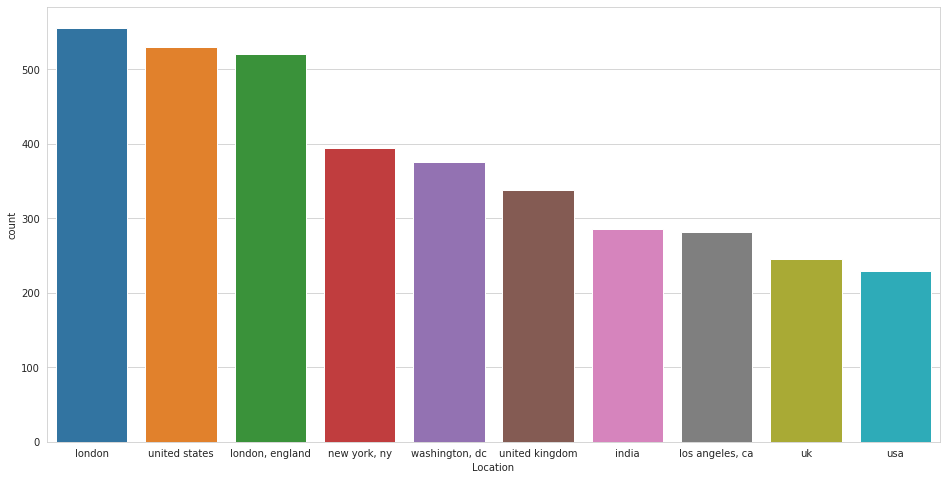

In [88]:
# Chart - 1 visualization code
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.countplot(x='Location',data=df1[df1['Location'].isin(loc.index)],order=loc.index)

##### 1. Why did you pick the specific chart?

To check which location has the highest number of users.

##### 2. What is/are the insight(s) found from the chart?

1. London has the highest active users follwed by United States.
2. India has 8th rank followed by UK and Australia.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2- Monthly

<Axes: xlabel='Month', ylabel='count'>

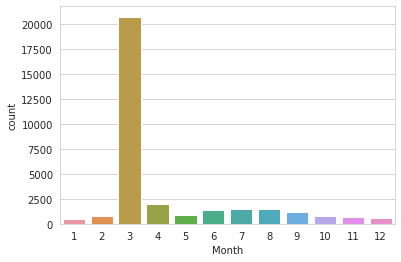

In [89]:
# Chart - 2 visualization code
sns.countplot(data=df1,x='Month')

##### 1. Why did you pick the specific chart?

To know which month was most active.

##### 2. What is/are the insight(s) found from the chart?

1. March has the highest tweets since the covid cases were rising significantly.
2. The rise in June, July and August is because of the increasing cases due to new variant of coronavirus. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3-Sentiments

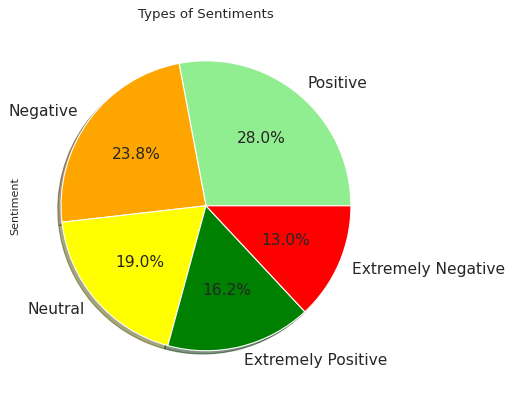

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [90]:
# Chart - 3 visualization code
# Plotting the pie chart for sentiment
plt.figure(figsize=(10,7), dpi=80)
df1['Sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['lightgreen','orange', 'yellow','green','red'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Sentiments")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()
#Table
s = df['Sentiment'].value_counts().reset_index()
s.columns = ['Sentiment','count']
s

##### 1. Why did you pick the specific chart?

To know the percentage of each type of sentiment

##### 2. What is/are the insight(s) found from the chart?

1. Positive has the highest percentage i.e 28%.
2. Negative has around 24%
3. Neutral has 19%.
4. Extremely positive has 16.2%.
5. Extremely negative has 13%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4-Tweet At

<Axes: xlabel='TweetAt'>

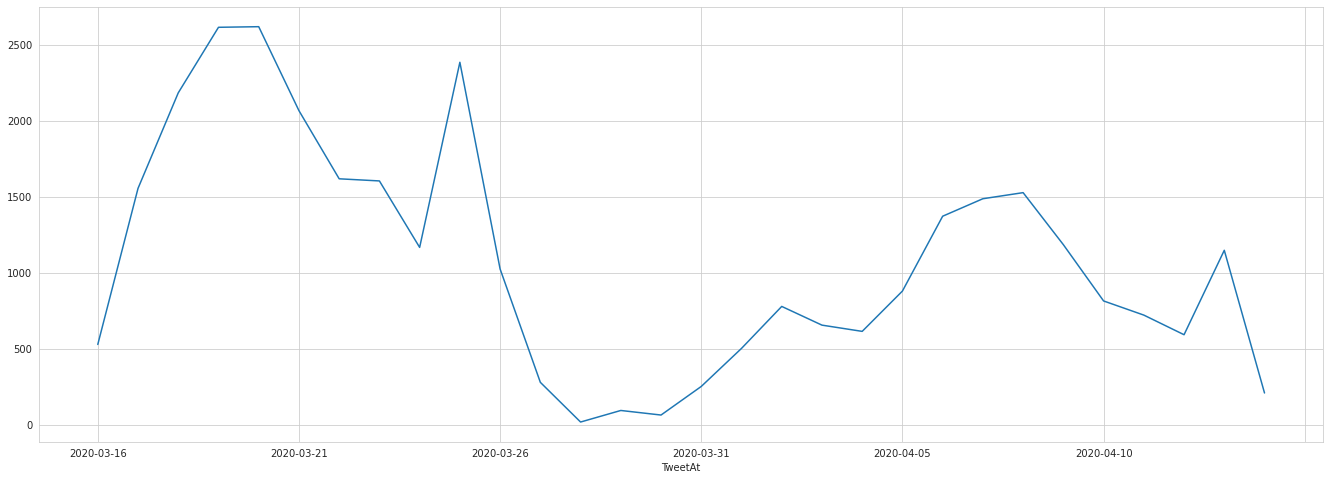

In [91]:
# Chart - 4 visualization code
df1['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df1['TweetAt'] = df1['TweetAt'].dt.strftime('%Y-%m-%d')
plt.figure(figsize=(23,8))
d=df1.groupby('TweetAt').count().sort_values(by='TweetAt')['OriginalTweet']
#d.sort_values(by='TweetAt')
d.plot()

##### 1. Why did you pick the specific chart?

To know which day has the most number of tweets.

##### 2. What is/are the insight(s) found from the chart?

1. Tweet started rising from 16/03/2020.
2. Number of Tweets were highest during 19/03/2020 to 20/03/2020.
3. After 25/03/2020 tweets dropped drastically.
4. On 28/03/2020 tweets were the least.
5. After 31/03/2020 tweets started to rose again.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Advertisement during the peak tweets can help in generating revenues for the companies.
2. During the days when tweets were the least it'll affect the Advertising companies.

#### Chart - 5-OriginalTweet

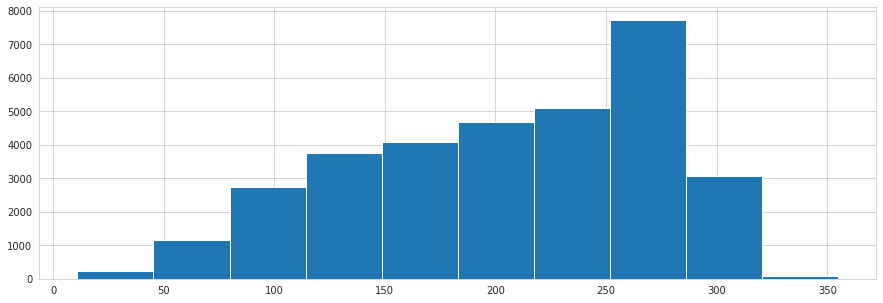

In [92]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
plt.hist(df1['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

To know under which category of length majority of the tweets falls under.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Tweets under 50 characters are around 200.
2. Majority of the tweets falls under the length of 250-280 characters.
3. Around 3000 tweets have length between 280-320.
4. Number of Tweets with character length more than 320 is approximately 100.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6-Sentiment

In [141]:
# Chart - 6 visualization code
df1['Sentiment']=df1['Sentiment'].replace(to_replace=["Extremely Positive", "Extremely Negative"],value=["Positive","Negative"])

<Axes: xlabel='Sentiment', ylabel='count'>

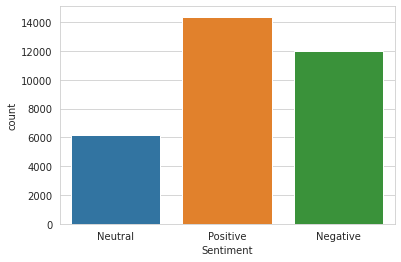

In [149]:
sns.countplot(data=df1,x='Sentiment')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [151]:
# Chart - 7 visualization code
dfp=df1[df1['Sentiment']=='Positive']
dfn=df1[df1['Sentiment']=='Negative']
dfnt=df1[df1['Sentiment']=='Neutral']

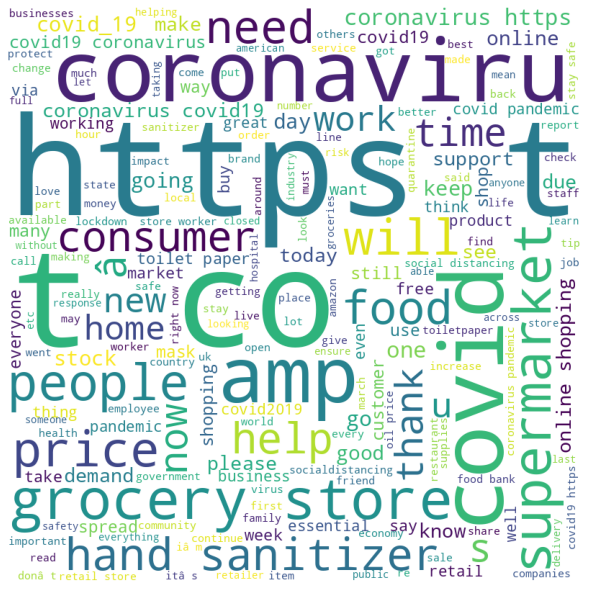

In [153]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in dfp.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

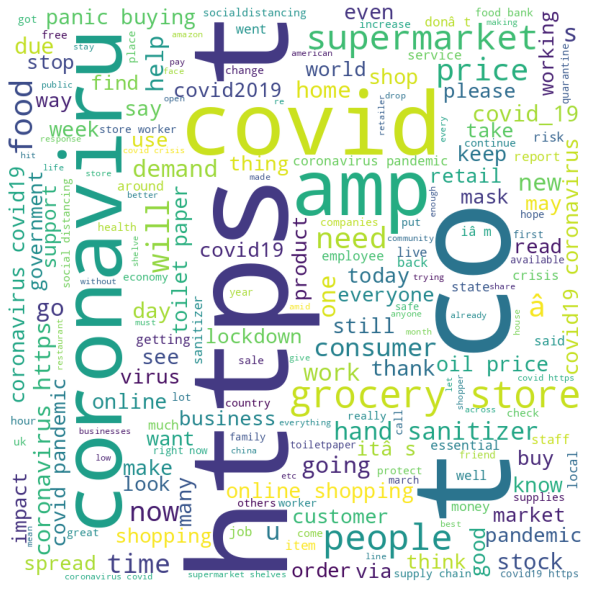

In [154]:
# iterate through the csv file
for val in dfn.OriginalTweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [95]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [96]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [97]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [98]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [99]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [100]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [101]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [102]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [103]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [104]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [105]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [106]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [107]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [108]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [109]:
# Expand Contraction

#### 2. Lower Casing

In [110]:
# Lower Casing

#### 3. Removing Punctuations

In [111]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [112]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [113]:
# Remove Stopwords

In [114]:
# Remove White spaces

#### 6. Rephrase Text

In [115]:
# Rephrase Text

#### 7. Tokenization

In [116]:
# Tokenization

#### 8. Text Normalization

In [117]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [118]:
# POS Taging

#### 10. Text Vectorization

In [119]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [120]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [121]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [122]:
# Transform Your data

### 6. Data Scaling

In [123]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [124]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [125]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [126]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [127]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [128]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [130]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [132]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [133]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [134]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [135]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [136]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***